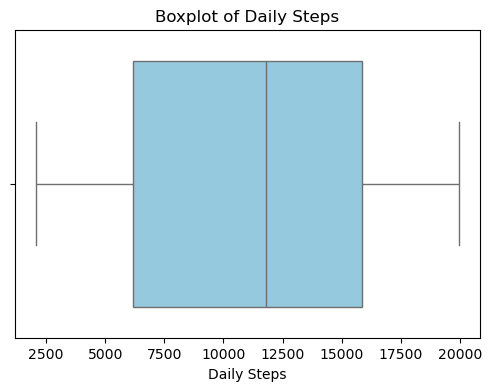

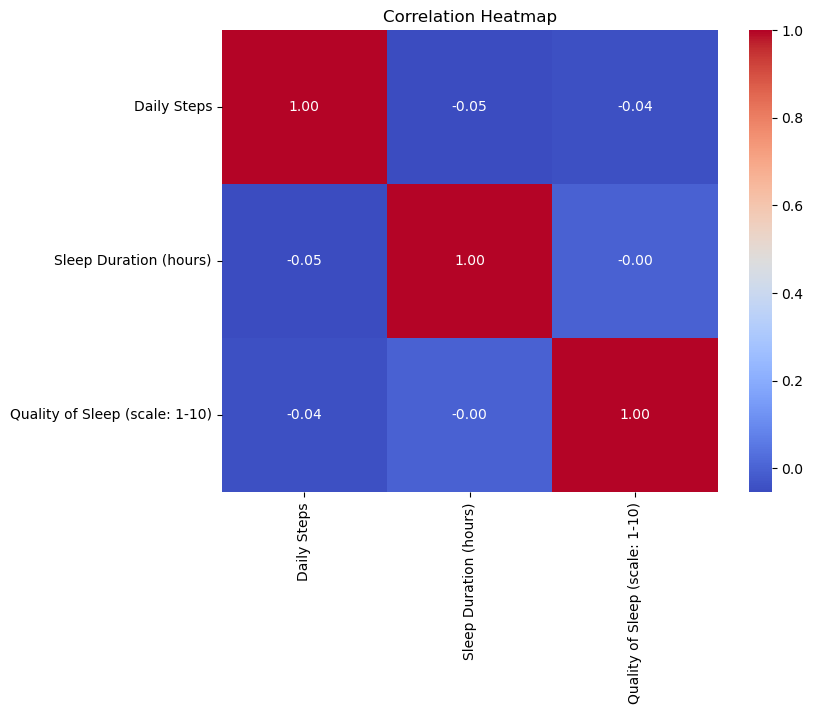

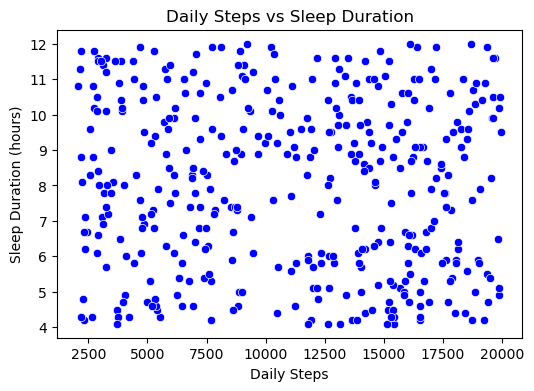

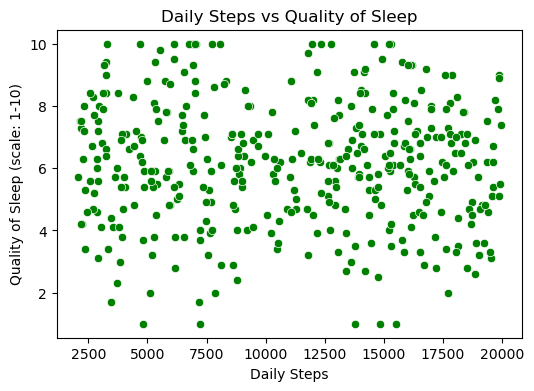


Metrics for Sleep Duration Model (Linear Regression):
MAE: 1.8990
MSE: 4.7438
RMSE: 2.1780
R2: -0.0181

Metrics for Quality of Sleep Model (Linear Regression):
MAE: 1.6146
MSE: 4.0724
RMSE: 2.0180
R2: -0.0450

Effect of Daily Steps on Sleep Health:
Daily steps have a weak effect on Sleep Duration (R² = -0.02).
Daily steps have a weak effect on Quality of Sleep (R² = -0.05).


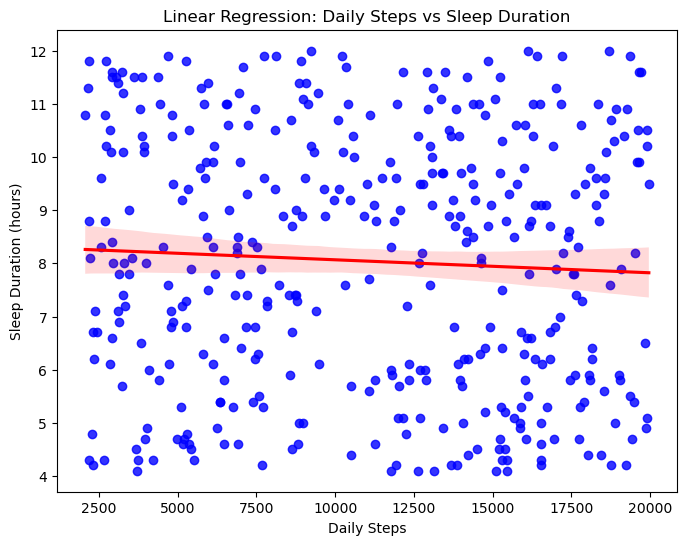

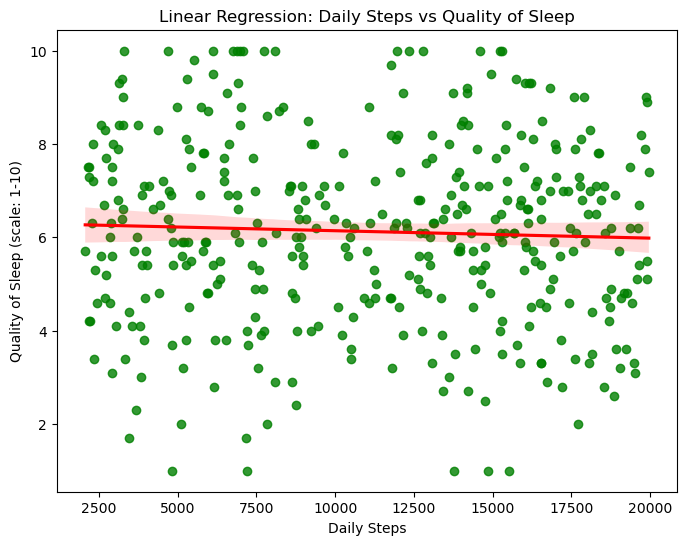

In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = r"C:\Users\Hussani\Downloads\sleep_health_lifestyle_dataset.csv"
df = pd.read_csv(file_path)

# Data Cleaning
# Fill missing values
df['Sleep Duration (hours)'] = df['Sleep Duration (hours)'].fillna(df['Sleep Duration (hours)'].mean())
df['Quality of Sleep (scale: 1-10)'] = df['Quality of Sleep (scale: 1-10)'].fillna(df['Quality of Sleep (scale: 1-10)'].mean())
df['Daily Steps'] = df['Daily Steps'].fillna(df['Daily Steps'].mean())

# Remove outliers from Daily Steps using IQR
Q1 = df['Daily Steps'].quantile(0.25)
Q3 = df['Daily Steps'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Daily Steps'] >= (Q1 - 1.5 * IQR)) & (df['Daily Steps'] <= (Q3 + 1.5 * IQR))]

# Exploratory Data Analysis
# Boxplot for Daily Steps
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Daily Steps'], color='skyblue')
plt.title("Boxplot of Daily Steps")
plt.xlabel("Daily Steps")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation = df[['Daily Steps', 'Sleep Duration (hours)', 'Quality of Sleep (scale: 1-10)']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Scatter Plots
# Daily Steps vs Sleep Duration
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['Daily Steps'], y=df['Sleep Duration (hours)'], color='blue')
plt.title("Daily Steps vs Sleep Duration")
plt.xlabel("Daily Steps")
plt.ylabel("Sleep Duration (hours)")
plt.show()

# Daily Steps vs Quality of Sleep
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['Daily Steps'], y=df['Quality of Sleep (scale: 1-10)'], color='green')
plt.title("Daily Steps vs Quality of Sleep")
plt.xlabel("Daily Steps")
plt.ylabel("Quality of Sleep (scale: 1-10)")
plt.show()

# Model Evaluation
# Features
X = df[['Daily Steps']]

# Targets
y_duration = df['Sleep Duration (hours)']
y_quality = df['Quality of Sleep (scale: 1-10)']

# Split data into training and testing sets for both target variables
X_train, X_test, y_train_duration, y_test_duration = train_test_split(X, y_duration, test_size=0.2, random_state=42)
X_train_quality, X_test_quality, y_train_quality, y_test_quality = train_test_split(X, y_quality, test_size=0.2, random_state=42)

# Linear Regression Model
lin_reg = LinearRegression()

# Model Evaluation for Sleep Duration
lin_reg.fit(X_train, y_train_duration)
y_pred_duration_test = lin_reg.predict(X_test)

# Evaluate performance for Sleep Duration
metrics_duration = {
    'MAE': mean_absolute_error(y_test_duration, y_pred_duration_test),
    'MSE': mean_squared_error(y_test_duration, y_pred_duration_test),
    'RMSE': np.sqrt(mean_squared_error(y_test_duration, y_pred_duration_test)),
    'R2': r2_score(y_test_duration, y_pred_duration_test)
}

# Model Evaluation for Quality of Sleep
lin_reg.fit(X_train_quality, y_train_quality)
y_pred_quality_test = lin_reg.predict(X_test_quality)

# Evaluate performance for Quality of Sleep
metrics_quality = {
    'MAE': mean_absolute_error(y_test_quality, y_pred_quality_test),
    'MSE': mean_squared_error(y_test_quality, y_pred_quality_test),
    'RMSE': np.sqrt(mean_squared_error(y_test_quality, y_pred_quality_test)),
    'R2': r2_score(y_test_quality, y_pred_quality_test)
}

# Display Results
print("\nMetrics for Sleep Duration Model (Linear Regression):")
for metric, value in metrics_duration.items():
    print(f"{metric}: {value:.4f}")

print("\nMetrics for Quality of Sleep Model (Linear Regression):")
for metric, value in metrics_quality.items():
    print(f"{metric}: {value:.4f}")

# Assess the effect of Daily Steps on Sleep Health
print("\nEffect of Daily Steps on Sleep Health:")
if metrics_duration['R2'] > 0.2:
    print(f"Daily steps significantly affect Sleep Duration (R² = {metrics_duration['R2']:.2f}).")
else:
    print(f"Daily steps have a weak effect on Sleep Duration (R² = {metrics_duration['R2']:.2f}).")

if metrics_quality['R2'] > 0.2:
    print(f"Daily steps significantly affect Quality of Sleep (R² = {metrics_quality['R2']:.2f}).")
else:
    print(f"Daily steps have a weak effect on Quality of Sleep (R² = {metrics_quality['R2']:.2f}).")

# Visualize the Linear Regression results for both models

# Sleep Duration Linear Regression Plot
plt.figure(figsize=(8, 6))
sns.regplot(x=df['Daily Steps'], y=df['Sleep Duration (hours)'], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title("Linear Regression: Daily Steps vs Sleep Duration")
plt.xlabel("Daily Steps")
plt.ylabel("Sleep Duration (hours)")
plt.show()

# Quality of Sleep Linear Regression Plot
plt.figure(figsize=(8, 6))
sns.regplot(x=df['Daily Steps'], y=df['Quality of Sleep (scale: 1-10)'], scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
plt.title("Linear Regression: Daily Steps vs Quality of Sleep")
plt.xlabel("Daily Steps")
plt.ylabel("Quality of Sleep (scale: 1-10)")
plt.show()
